In [30]:
import pandas as pd
import numpy as np
import seaborn as sns
from tensorflow import keras
df = pd.read_csv('Irisdataset.csv')
df

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [31]:
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [32]:
df['Species'].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Species, dtype: int64

In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [34]:
df.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [35]:
df.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [36]:
df.corr()

C:\Users\kotap\AppData\Local\Temp\ipykernel_22268\1134722465.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
Id,1.000000,0.716676,-0.397729,0.882747,0.899759
SepalLengthCm,0.716676,1.000000,-0.109369,0.871754,0.817954
SepalWidthCm,-0.397729,-0.109369,1.000000,-0.420516,-0.356544
PetalLengthCm,0.882747,0.871754,-0.420516,1.000000,0.962757
PetalWidthCm,0.899759,0.817954,-0.356544,0.962757,1.000000


In [37]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['Species'] = le.fit_transform(df['Species'])
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,0
1,2,4.9,3.0,1.4,0.2,0
2,3,4.7,3.2,1.3,0.2,0
3,4,4.6,3.1,1.5,0.2,0
4,5,5.0,3.6,1.4,0.2,0


In [38]:
species_name = le.classes_
print(species_name)

['Iris-setosa' 'Iris-versicolor' 'Iris-virginica']


In [39]:
X = df.drop(columns=["Id","Species"])
y = df["Species"]
print(X.head(3))
print(y.head(3))

   SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
0            5.1           3.5            1.4           0.2
1            4.9           3.0            1.4           0.2
2            4.7           3.2            1.3           0.2
0    0
1    0
2    0
Name: Species, dtype: int32


In [40]:
print(X.shape)
print(y.shape)

(150, 4)
(150,)


In [41]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X, y,test_size=0.3,shuffle=True,random_state=69)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(105, 4)
(45, 4)
(105,)
(45,)


In [42]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
print(X_train[:1])
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)
print(X_train[:1])

    SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
57            4.9           2.4            3.3           1.0
[[-1.14630942 -1.44374444 -0.25650655 -0.258263  ]]


In [43]:
y_train = keras.utils.to_categorical(y_train, num_classes=3)
print(y_train[:5])

[[0. 1. 0.]
 [0. 0. 1.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]]


In [44]:
from keras.models import Sequential
from keras.layers import Dense, Dropout
model = Sequential()
model.add(Dense(units=32, activation='relu', input_shape=(X_train.shape[-1], )))

model.add(Dropout(0.5))
model.add(Dense(units=3, activation='softmax'))

In [45]:
model.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 32)                160       
                                                                 
 dropout_1 (Dropout)         (None, 32)                0         
                                                                 
 dense_3 (Dense)             (None, 3)                 99        
                                                                 
Total params: 259 (1.01 KB)
Trainable params: 259 (1.01 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [46]:
model.fit(X_train, y_train, epochs=100, verbose=2)

Epoch 1/100
4/4 - 1s - loss: 1.2015 - accuracy: 0.2762 - 867ms/epoch - 217ms/step
Epoch 2/100
4/4 - 0s - loss: 1.1586 - accuracy: 0.2857 - 32ms/epoch - 8ms/step
Epoch 3/100
4/4 - 0s - loss: 1.1162 - accuracy: 0.3714 - 22ms/epoch - 6ms/step
Epoch 4/100
4/4 - 0s - loss: 1.0597 - accuracy: 0.4000 - 25ms/epoch - 6ms/step
Epoch 5/100
4/4 - 0s - loss: 1.0581 - accuracy: 0.3524 - 10ms/epoch - 3ms/step
Epoch 6/100
4/4 - 0s - loss: 1.0123 - accuracy: 0.4952 - 16ms/epoch - 4ms/step
Epoch 7/100
4/4 - 0s - loss: 0.9907 - accuracy: 0.4190 - 16ms/epoch - 4ms/step
Epoch 8/100
4/4 - 0s - loss: 0.9030 - accuracy: 0.5714 - 21ms/epoch - 5ms/step
Epoch 9/100
4/4 - 0s - loss: 0.9762 - accuracy: 0.4857 - 15ms/epoch - 4ms/step
Epoch 10/100
4/4 - 0s - loss: 0.9274 - accuracy: 0.4952 - 17ms/epoch - 4ms/step
Epoch 11/100
4/4 - 0s - loss: 0.8779 - accuracy: 0.5810 - 17ms/epoch - 4ms/step
Epoch 12/100
4/4 - 0s - loss: 0.8426 - accuracy: 0.6095 - 16ms/epoch - 4ms/step
Epoch 13/100
4/4 - 0s - loss: 0.8987 - accurac

In [47]:
prediction = model.predict(X_test)
print(prediction[:5])

2/2 [==============================] - 0s 6ms/step
[[9.9754745e-01 2.1208222e-03 3.3183504e-04]
 [5.2714679e-02 5.8806437e-01 3.5922092e-01]
 [9.9241179e-01 6.9078230e-03 6.8032608e-04]
 [8.0333268e-03 1.7687945e-01 8.1508732e-01]
 [9.9032742e-01 8.5401889e-03 1.1323815e-03]]


In [48]:
prediction = np.argmax(prediction, axis=-1)
print(prediction[:5])

[0 1 0 2 0]


In [49]:
print(y_test[:5])

4      0
58     1
20     0
114    2
31     0
Name: Species, dtype: int32


In [50]:
from sklearn.metrics import accuracy_score, confusion_matrix
print(accuracy_score(y_test, prediction))

0.8888888888888888


In [51]:
cm = confusion_matrix(y_test, prediction)
print(cm)

[[16  0  0]
 [ 0  8  4]
 [ 0  1 16]]


Text(50.72222222222221, 0.5, 'actual')

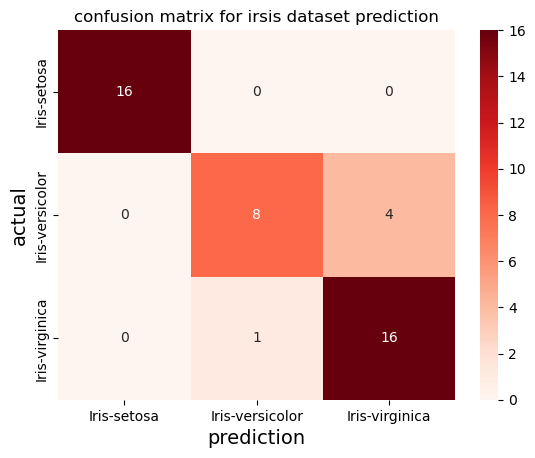

In [52]:
ax = sns.heatmap(cm, annot=True, fmt='d', cmap='Reds', xticklabels=species_name, yticklabels=species_name)
ax.set_title('confusion matrix for irsis dataset prediction')
ax.set_xlabel('prediction', fontsize=14)
ax.set_ylabel('actual', fontsize=14)

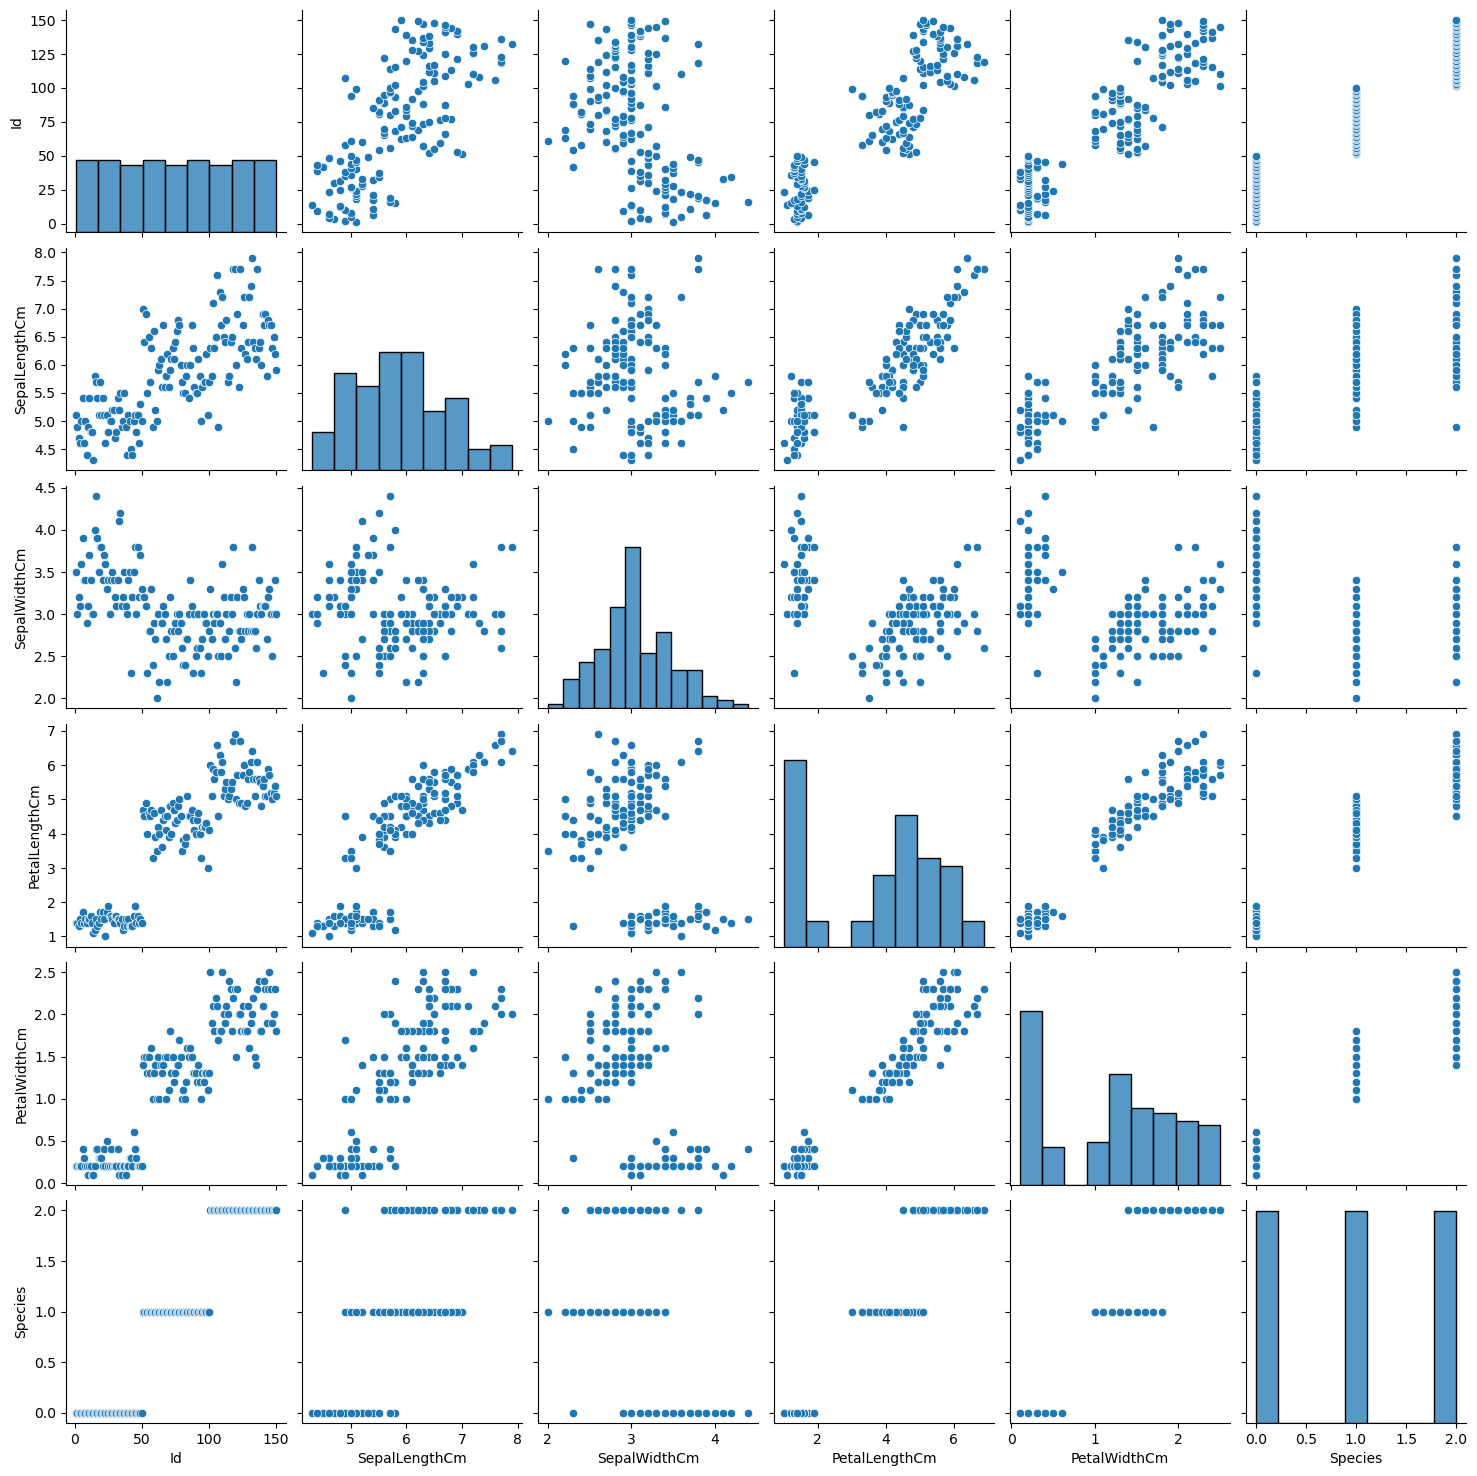

In [53]:
import seaborn as sns
sns.pairplot(df)

<Axes: >

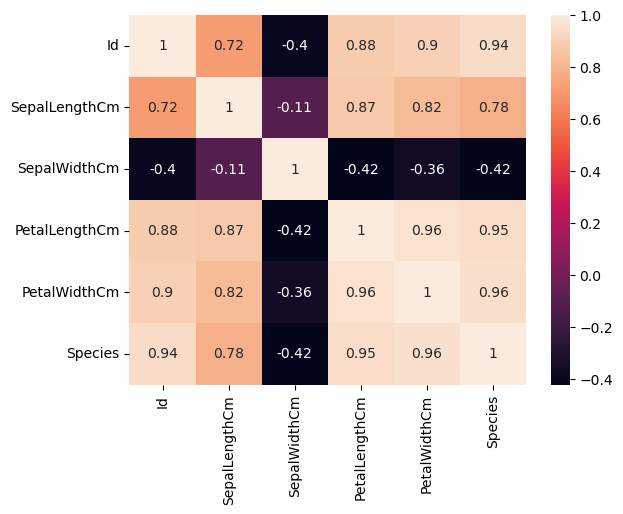

In [54]:
sns.heatmap(df.corr(),annot=True)